In [118]:
import pandas as pd
import matplotlib.pyplot as plt


In [119]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
input = df[['Pclass','Sex','Age','Fare']]
target = df.Survived
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
input['Sex'] = le.fit_transform(df['Sex'])



C:\Users\Welcome\AppData\Local\Temp\ipykernel_14388\2217714293.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['Sex'] = le.fit_transform(df['Sex'])


Text(0, 0.5, 'Count of Missing Values')

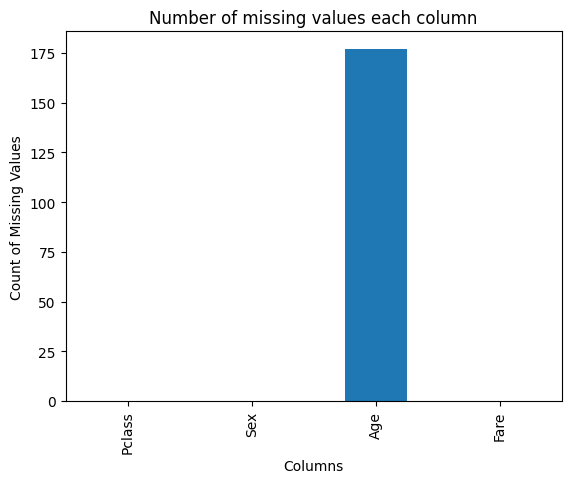

In [121]:
null_count = input.isna().sum() #Check null values in each 

null_count.plot(kind = 'bar')
plt.title("Number of missing values each column")
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')

In [122]:
input.Age = input.Age.fillna(input.Age.mean())

C:\Users\Welcome\AppData\Local\Temp\ipykernel_14388\929077335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input.Age = input.Age.fillna(input.Age.mean())


In [123]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(input,target,test_size=0.2)

In [124]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [125]:
model.score(X_test,y_test)

0.8379888268156425